# Bike Sharing Assignment
## Assignment is divided into following parts:
- Data Understanding
- EDA
- Dummy Variables Encoding
- Splitting the Data into Training and Testing Sets
- Building our Model powered by sklearn RFE and Statsmodel API
- Residual Analysis on train data
- Looking for patterns in the residuals
- Making Predictions on test set
- Model Evaluation
- Conclusion

# Assignment Created by:
# NISHU KUMARI

## Problem Statement:

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- Service Provider Farm wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands.
      
## Business Goal:
- We need to design the model of demand for shared bikes with the available independent variables.
- It will be used by the management to understand how exactly the demands vary with different features.
- Accordingly, Company can manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- The model will be a good way for management to understand the demand dynamics of a new market. 
------------
- __Build a multiple linear regression model for the prediction of demand for shared bikes.__
- __cnt__ is target variable

## Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# to display all coulmns of a dataframe
pd.set_option('display.max_column', None)

# to display all rows of a dataframe
pd.set_option('display.max_rows', None)

# to display all items of a long sequence
pd.set_option('display.max_seq_items', None)

# to display complete contents inside a cell in dataframe
pd.set_option('display.max_colwidth', None)

pd.set_option('expand_frame_repr', True)

## Reading and Understanding the Data

In [5]:
bike_df = pd.read_csv("day.csv")

In [7]:
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## data contains 730 rows and 16 columns

In [9]:
bike_df.shape

(730, 16)

## These columns are not required from model development point of view. Let's drop them.

In [11]:
drop_these_columns = ["instant",
                      "dteday"]
bike_df.drop(drop_these_columns, inplace=True, axis=1)
bike_df.shape

(730, 14)

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

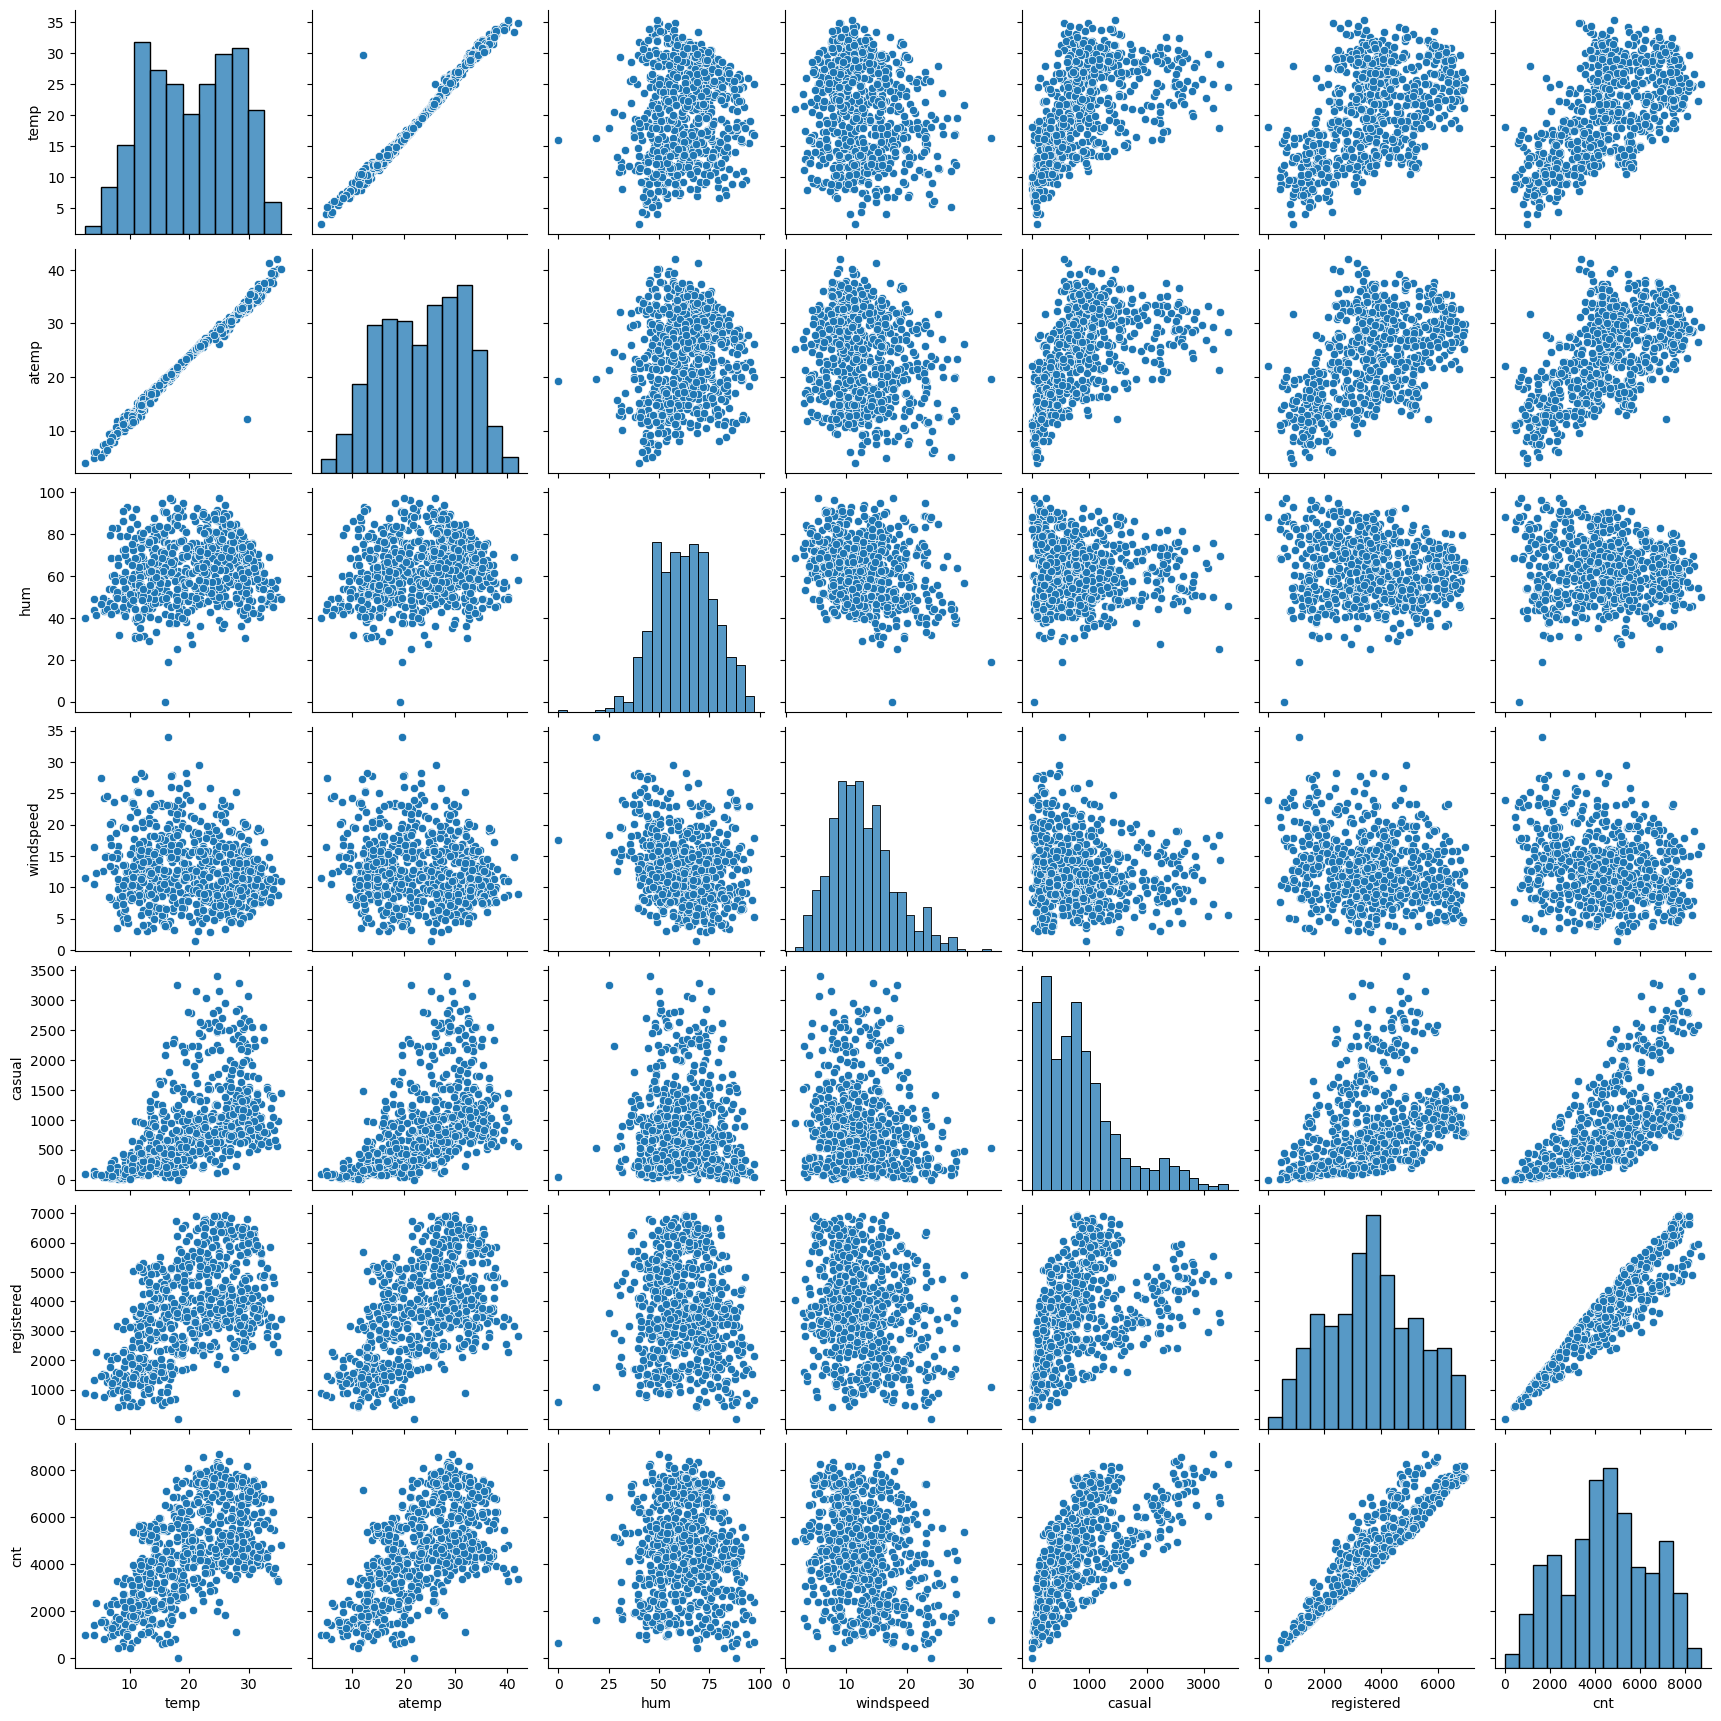

In [13]:
sns.pairplot(bike_df[["temp","atemp","hum","windspeed","casual","registered","cnt"]])
plt.show()

## Few observations from above pairplot:
#### 1. temp and atemp are highly correlated.
#### 2. temp is also correlated with casual, registered and cnt.
#### 3. atemp is also correlated with casual, registered and cnt.
#### 4. casual is correlated with registered and cnt. And thats obvious because casual + registered = cnt

#### We need to take care of these correlations among possible predictor variables to avoid multicollinearity once we will start building our Multiple Linear Regression Model.

#### Also we will not use casual and registered in our pre processed data for model training. This might leak out the crucial information and model might get overfit.

## Let's check the correlation coefficients to see which variables are highly correlated

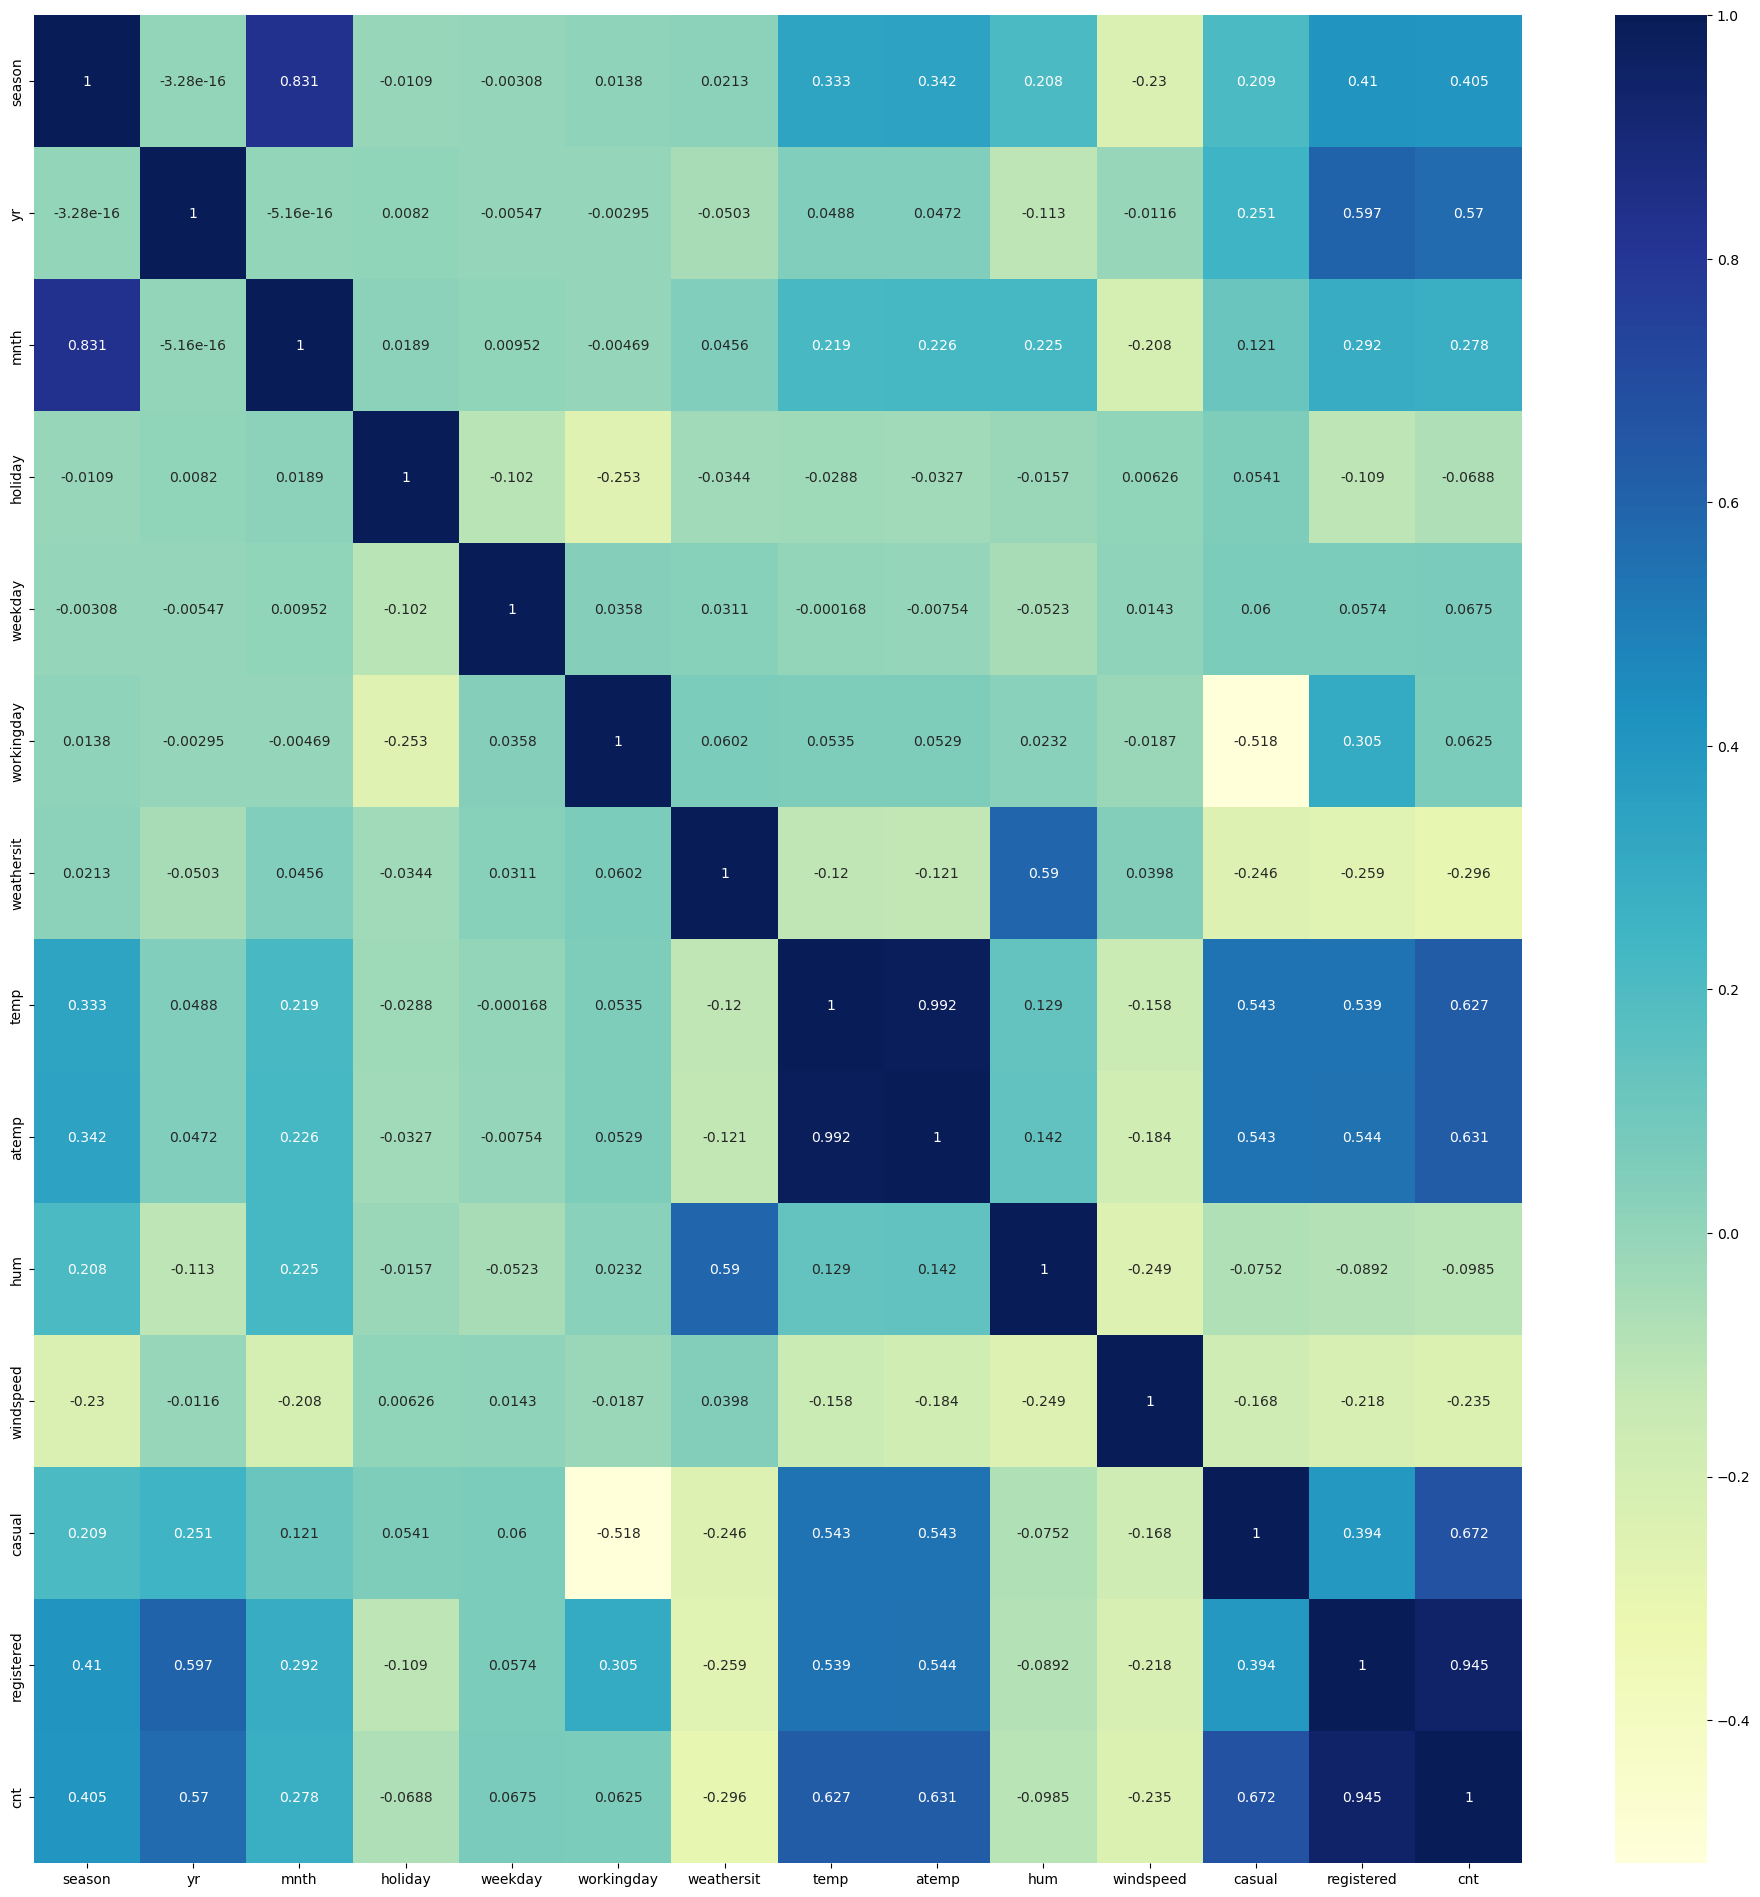

In [15]:
plt.figure(figsize = (24, 24))
sns.heatmap(bike_df.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

## Few observations from above heat map:
### 1) Apart from casual and registered (we'll drop them), atemp is having highest correlation coefficient with cnt followed by temp.
### 2) season is correlated with cnt. correlation coefficeint is decent. Neither too high nor too low.
### 3) yr is also corrleated with cnt. It can be a contributing factor.
### 4) mnth correlation coefficient is on low side. We need to check this statistically. It might be the case that only few months are statistically significant from model perspective.
### 5) holiday is negatively correlated with cnt.
### 6) Similarly need to check the statistical significance for weekday, workingday, weathersit, hum and windspeed.

## Visualising Categorical Variables

### As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

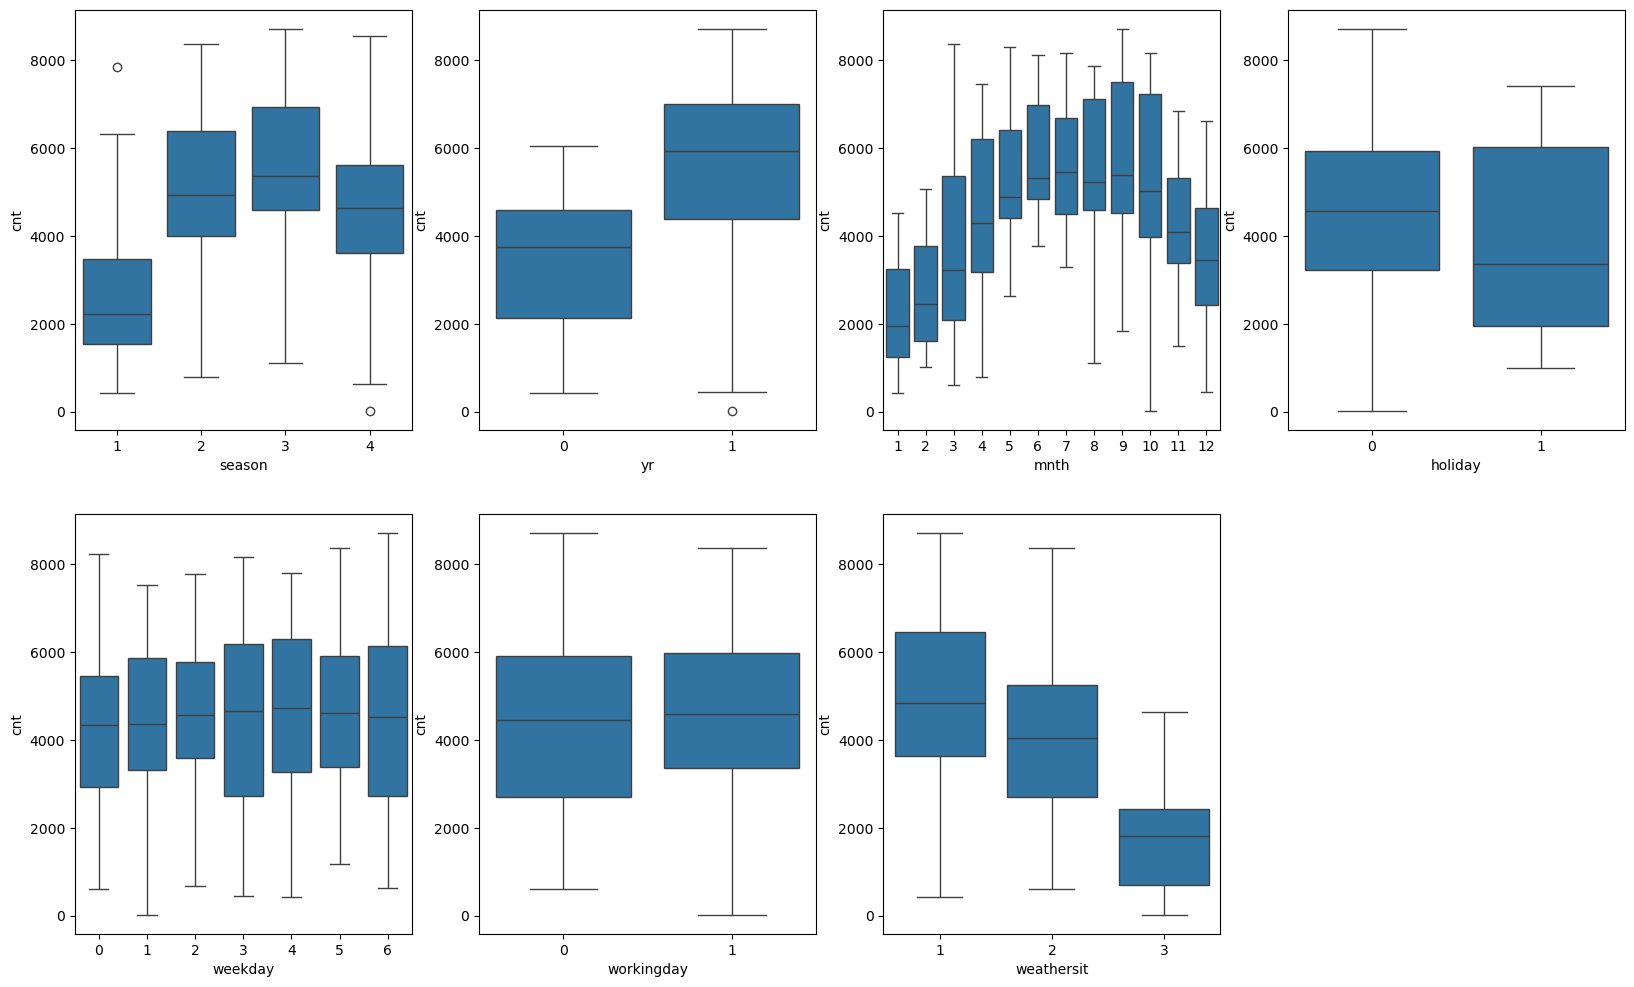

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

## Few observations from above heat map:
### 1. Median of bike rental count is highest for fall season. Need to check the statistical significance of this.
### 2. Also maximum bike rental count is for fall season.
### 3. Median of bike rental count is highest for year 2019. Also maximum bike rental count is for year 2019.
### 4. Highest bike rental count is for month 9 i.e. September.
### 5. Median of bike rental count is highest for month 7 i.e. July.
### 6. Lowest bike rental count is for month 10 i.e. October.
### 7. Median and highest bike rental count is for no holiday days marked with 0.
### 8. Bike rental median for all days are almost close to each other.
### 9. Bike rental median for working/non-working days are almost close to each other.
### 10. Bike rental median is highest for weathersit 1. Also maximum bike rental count is for weathersit 1 and lowest is for weathersit 3.

## Custom Map Functions

In [19]:
# Defining the season map function
def mapping_season_col(x):
    return x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# Defining the weather map function
def mapping_weathersit_col(x):
    return x.map({1:"weathersit_1", 2:"weathersit_2", 3:"weathersit_3", 4:"weathersit_4"})

# Defining the month map function
def mapping_month_col(x):
    return x.map({1:"month_1",
                  2:"month_2",
                  3:"month_3",
                  4:"month_4",
                  5:"month_5",
                  6:"month_6",
                  7:"month_7",
                  8:"month_8",
                  9:"month_9",
                  10:"month_10",
                  11:"month_11",
                  12:"month_12"})

# Defining the weekday map function
def mapping_weekday_col(x):
    return x.map({0:"Monday",
                  1:"Tuesday",
                  2:"Wednesday",
                  3:"Thursday",
                  4:"Friday",
                  5:"Saturday",
                  6:"Sunday"})

# Applying the function to the season column
bike_df[["season"]] = bike_df[["season"]].apply(mapping_season_col)

# Applying the function to the weathersit column
bike_df[["weathersit"]] = bike_df[["weathersit"]].apply(mapping_weathersit_col)

# Applying the function to the month column
bike_df[["mnth"]] = bike_df[["mnth"]].apply(mapping_month_col)

# Applying the function to the weekday column
bike_df[["weekday"]] = bike_df[["weekday"]].apply(mapping_weekday_col)

## Dummy Variables Encoding

In [21]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy_var'
season_dummy_var = pd.get_dummies(bike_df["season"], drop_first = True)

In [23]:
season_dummy_var.head()

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [25]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy_var'
weathersit_dummy_var = pd.get_dummies(bike_df["weathersit"],drop_first = True)

In [27]:
weathersit_dummy_var.head()

,weathersit_2,weathersit_3
0,True,False
1,True,False
2,False,False
3,False,False
4,False,False


In [29]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummy_var'
mnth_dummy_var = pd.get_dummies(bike_df["mnth"],drop_first = True)

In [31]:
mnth_dummy_var.head()

,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [33]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy_var'
weekday_dummy_var = pd.get_dummies(bike_df["weekday"],drop_first = True)

In [35]:
weekday_dummy_var.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,False,False,True,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False


In [37]:
# Add the results to the original bike_df dataframe

bike_df = pd.concat([bike_df, season_dummy_var, weathersit_dummy_var, mnth_dummy_var, weekday_dummy_var], axis = 1)

In [39]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,month_1,0,Sunday,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,spring,0,month_1,0,Monday,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,spring,0,month_1,0,Tuesday,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,spring,0,month_1,0,Wednesday,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,spring,0,month_1,0,Thursday,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [41]:
drop_these_columns_2 = ["season",
                        "weathersit",
                        "mnth",
                        "weekday",
                        "casual",
                        "registered"]
bike_df.drop(drop_these_columns_2, inplace=True, axis=1)
bike_df.shape

(730, 30)

In [43]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [45]:
bike_df.shape

(730, 30)

## Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [47]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [51]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
scaler = MinMaxScaler()

num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [53]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


In [55]:
bike_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# *Before start the train process we will plot a heat map to check multicollinearity*

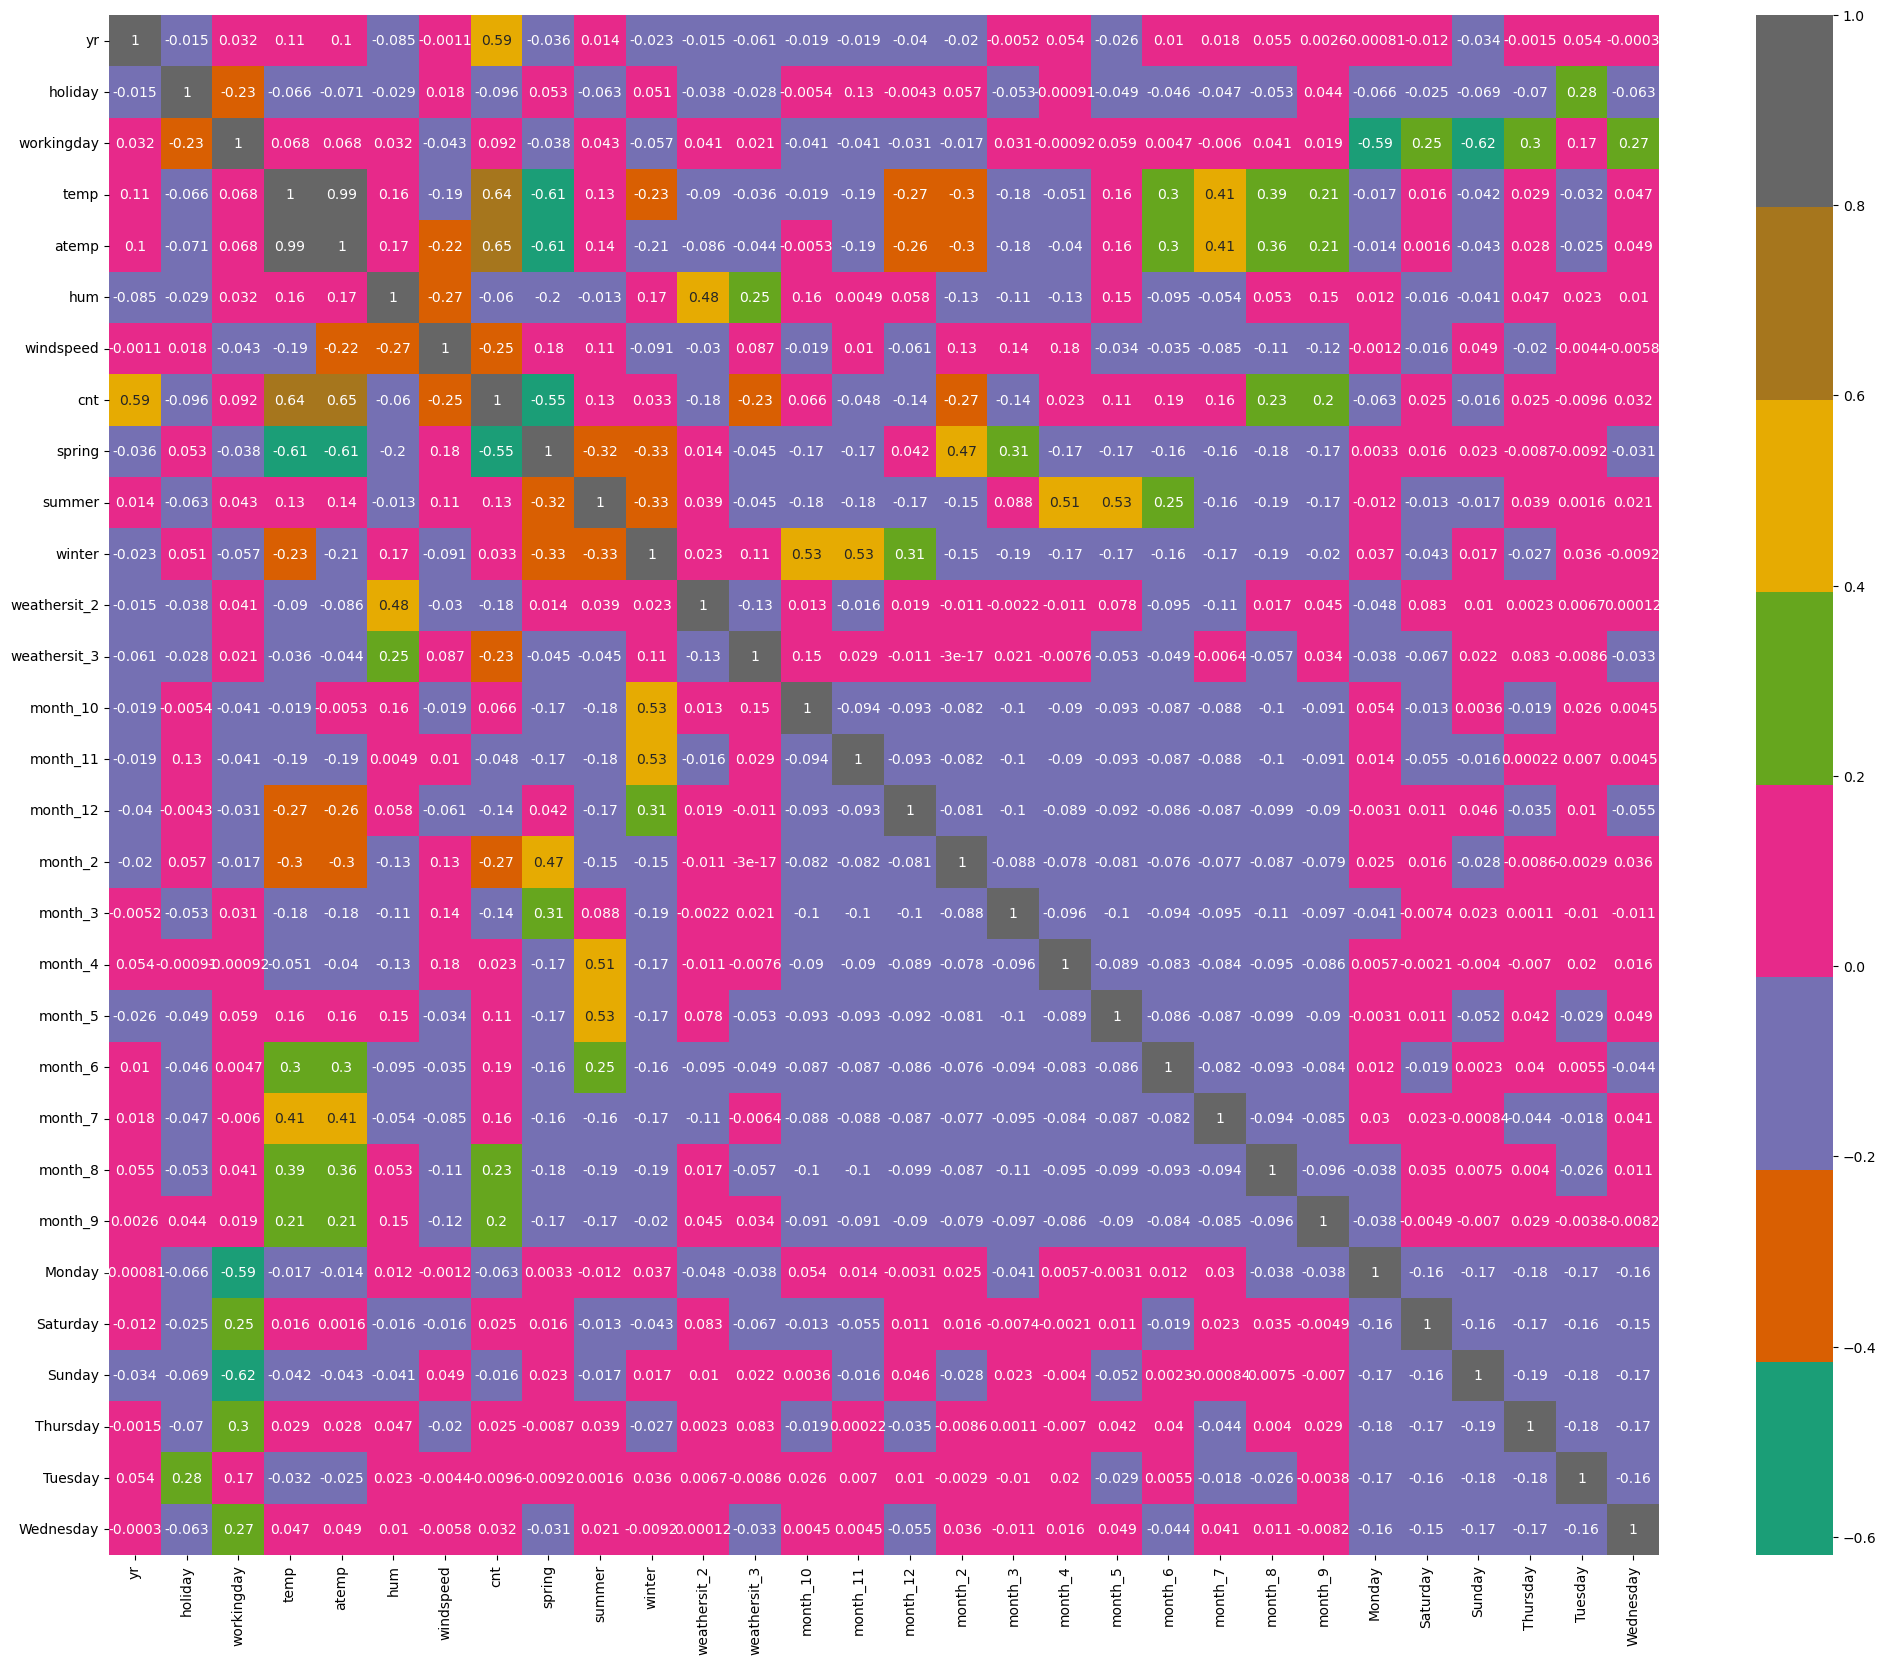

In [57]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(bike_df_train.corr(),annot =True, cmap= 'Dark2')
plt.show()

### As we can see from above table, all values have been mapped between 0 and 1 where maximum value is 1 and minimum value is 0. This has been performed by MinMaxScaler().

### Dividing into X and Y sets for the model building

In [59]:
# Dividing training set into X_train and y_train sets for the model building

y_train = bike_df_train.pop('cnt')
X_train = bike_df_train
## assigning all feature variables to x train

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [101]:
#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

## RFE (Recursive Feature Elimination)

In [103]:
# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [105]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('month_10', False, 2),
 ('month_11', False, 12),
 ('month_12', False, 13),
 ('month_2', False, 6),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', False, 11),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 7),
 ('Sunday', False, 3),
 ('Thursday', False, 8),
 ('Tuesday', False, 14),
 ('Wednesday', False, 15)]

In [107]:
col = X_train.columns[rfe.support_] ## variables suggested by RFE
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'weathersit_2', 'weathersit_3', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_8', 'month_9'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_] ## rejected variables

Index(['workingday', 'atemp', 'summer', 'month_10', 'month_11', 'month_12',
       'month_2', 'month_7', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics
## We are assuming significance level of 0.05.

In [111]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [217]:
# Calculate the VIFs for the new model
def calculate_VIF(col, X_train):
    vif = pd.DataFrame()
    
    # Ensure `col` is a list of strings (column names)
    if not isinstance(col, list):
        col = list(col)  

    vif['Features'] = col
    
    # Compute VIF values
    vif['VIF'] = [variance_inflation_factor(X_train[col].values.astype(float), i) 
                  for i in range(X_train[col].shape[1])]
    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    
    display(vif)

In [219]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [221]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [223]:
# Convert all columns to numeric
X_train_rfe = X_train_rfe.astype(int)

In [225]:
# Check for NaN values (If found, handle them appropriately)
print("Missing values:\n", X_train_rfe.isnull().sum())


Missing values:
 const           0
yr              0
holiday         0
temp            0
hum             0
windspeed       0
spring          0
winter          0
weathersit_2    0
weathersit_3    0
month_3         0
month_4         0
month_5         0
month_6         0
month_8         0
month_9         0
dtype: int64


In [227]:
print(X_train_rfe.dtypes)

const           int32
yr              int32
holiday         int32
temp            int32
hum             int32
windspeed       int32
spring          int32
winter          int32
weathersit_2    int32
weathersit_3    int32
month_3         int32
month_4         int32
month_5         int32
month_6         int32
month_8         int32
month_9         int32
dtype: object


In [229]:
X_train_rfe.fillna(X_train_rfe.mean(), inplace=True)  # Replace NaNs with mean
y_train.fillna(y_train.mean(), inplace=True)          # Replace NaNs in y_train

In [231]:
print("X_train_rfe shape:", X_train_rfe.shape)
print("y_train shape:", y_train.shape)

X_train_rfe shape: (510, 16)
y_train shape: (510,)


In [233]:
X_train_rfe = X_train_rfe.loc[y_train.index]

In [235]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [237]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.15e-146
Time:                        00:59:22   Log-Likelihood:                 407.95
No. Observations:                 510   AIC:                            -787.9
Df Residuals:                     496   BIC:                            -728.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4617      0.016     29.065   

Looking at the p-values, it looks like holiday variable is not really significant (in the presence of other variables).

Maybe we could drop it?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [239]:
calculate_VIF(col,X_train)

,Features,VIF
0,yr,1.85
7,weathersit_2,1.54
5,spring,1.50
6,winter,1.39
9,month_3,1.24
13,month_8,1.17
10,month_4,1.14
11,month_5,1.14
14,month_9,1.12
12,month_6,1.08


## We need to bring all VIFs below 5 to avoid multicollinearity issue.

## Model 2

In [241]:
X_train_new = X_train[col].drop(["holiday"], axis = 1) # dropping holiday variable

In [243]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [245]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model

In [247]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          6.83e-146
Time:                        00:59:53   Log-Likelihood:                 403.56
No. Observations:                 510   AIC:                            -781.1
Df Residuals:                     497   BIC:                            -726.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4589      0.016     28.722   

In [249]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
0,yr,1.85
6,weathersit_2,1.53
4,spring,1.47
5,winter,1.37
8,month_3,1.23
12,month_8,1.17
9,month_4,1.14
10,month_5,1.14
13,month_9,1.11
11,month_6,1.08


## Model 3

In [251]:
X_train_new = X_train_new.drop(["hum"], axis = 1) # dropping "hum" variable

In [253]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [255]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the 3rd linear model

In [257]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          6.83e-146
Time:                        01:00:07   Log-Likelihood:                 403.56
No. Observations:                 510   AIC:                            -781.1
Df Residuals:                     497   BIC:                            -726.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4589      0.016     28.722   

In [259]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
0,yr,1.85
5,weathersit_2,1.53
3,spring,1.47
4,winter,1.37
7,month_3,1.23
11,month_8,1.17
8,month_4,1.14
9,month_5,1.14
12,month_9,1.11
10,month_6,1.08


## Model 4

In [264]:
print(X_train_new.columns)

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'weathersit_2',
       'weathersit_3', 'month_3', 'month_4', 'month_5', 'month_6', 'month_8',
       'month_9'],
      dtype='object')


In [266]:
if "Monday" in X_train_new.columns:
    X_train_new = X_train_new.drop(["Monday"], axis=1)
else:
    print("Column 'Monday' not found in X_train_new")

Column 'Monday' not found in X_train_new


In [268]:
print([col for col in X_train_new.columns if "mon" in col.lower()])

['month_3', 'month_4', 'month_5', 'month_6', 'month_8', 'month_9']


In [276]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [278]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the 4th linear model

In [280]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          6.83e-146
Time:                        01:02:50   Log-Likelihood:                 403.56
No. Observations:                 510   AIC:                            -781.1
Df Residuals:                     497   BIC:                            -726.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4589      0.016     28.722   

In [282]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
0,yr,1.85
5,weathersit_2,1.53
3,spring,1.47
4,winter,1.37
7,month_3,1.23
11,month_8,1.17
8,month_4,1.14
9,month_5,1.14
12,month_9,1.11
10,month_6,1.08


## Model 5

In [284]:
X_train_new = X_train_new.drop(["month_8"], axis = 1) ## dropping month_8

In [286]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [288]:
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the 5th linear model

In [290]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.06e-142
Time:                        01:03:04   Log-Likelihood:                 393.41
No. Observations:                 510   AIC:                            -762.8
Df Residuals:                     498   BIC:                            -712.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5031      0.013     39.204   

In [292]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
0,yr,1.67
5,weathersit_2,1.47
3,spring,1.43
4,winter,1.33
7,month_3,1.23
8,month_4,1.12
9,month_5,1.12
11,month_9,1.10
10,month_6,1.07
6,weathersit_3,1.06


## Model 6

In [294]:
# X_train_new = X_train_new.drop(["month_6"], axis = 1) ## dropping month_6

X_train_new = X_train_new.drop(["month_9"], axis = 1)


In [296]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [298]:
lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the 6th linear model

In [300]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.50e-138
Time:                        01:03:16   Log-Likelihood:                 380.98
No. Observations:                 510   AIC:                            -740.0
Df Residuals:                     499   BIC:                            -693.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5265      0.012     43.058   

In [302]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
0,yr,1.61
3,spring,1.42
5,weathersit_2,1.42
4,winter,1.33
7,month_3,1.23
8,month_4,1.11
9,month_5,1.11
10,month_6,1.07
6,weathersit_3,1.05
2,windspeed,1.01


## Model 7

In [306]:
print(X_train_new.columns)

Index(['yr', 'temp', 'windspeed', 'spring', 'winter', 'weathersit_2',
       'weathersit_3', 'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')


In [308]:
if "Sunday" in X_train_new.columns:
    X_train_new = X_train_new.drop(["Sunday"], axis=1)

In [312]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_new)

In [314]:
lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the 7th linear model

In [316]:
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.50e-138
Time:                        01:05:21   Log-Likelihood:                 380.98
No. Observations:                 510   AIC:                            -740.0
Df Residuals:                     499   BIC:                            -693.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5265      0.012     43.058   

In [318]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
0,yr,1.61
3,spring,1.42
5,weathersit_2,1.42
4,winter,1.33
7,month_3,1.23
8,month_4,1.11
9,month_5,1.11
10,month_6,1.07
6,weathersit_3,1.05
2,windspeed,1.01


## 1. Model 7 is our final model.
## 2. R-Squared value 0.832 and adjusted R-Squared value is 0.828.
## 3. All VIFs are now below 5.
## 4. All p-values are below 0.05 (Rejecting the NULL hypothesis)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [374]:
y_train_cnt = lm_7.predict(X_train_lm)

In [376]:
## Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.11463913015091644

In [382]:
%matplotlib inline
import matplotlib.pyplot as plt

In [384]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

### The residuals are following the normally distributed with a mean 0. All good!

## Looking for patterns in the residuals

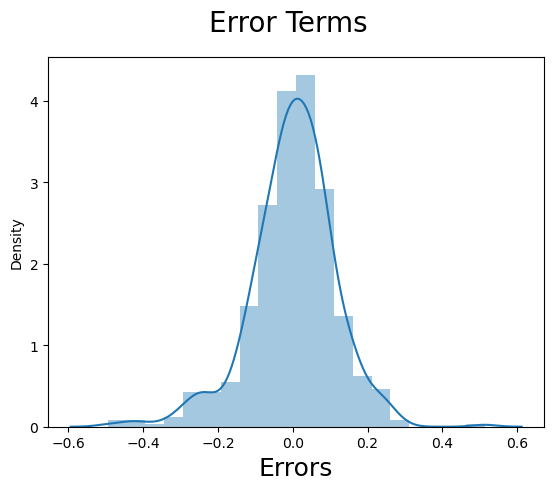

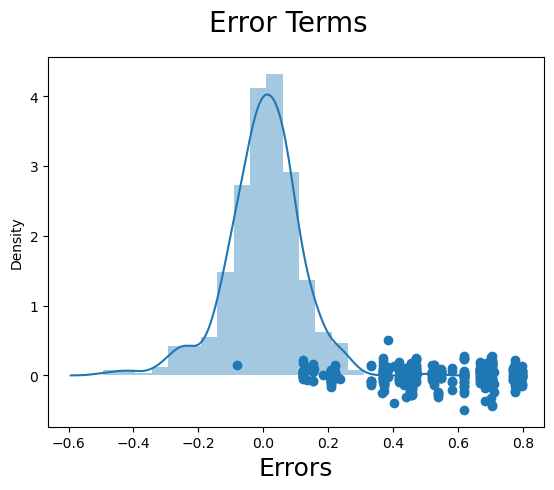

In [386]:
plt.scatter(y_train_cnt,(y_train - y_train_cnt))
plt.show()

From above plot we can see that residuals (also known as error terms) are independent. This means that there is no correlation between the residuals and the predicted values, or among the residuals themselves.

### We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

## Making Predictions

#### Applying the scaling on the test sets

In [ ]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [403]:
bike_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,weathersit_2,weathersit_3,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
221,0,0,1,0.881625,0.795343,0.437098,0.339570,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


#### Dividing into X_test and y_test

In [ ]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test

In [407]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [409]:
# Making predictions
y_pred = lm_7.predict(X_test_new)

## Model Evaluation

In [411]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

## Looking at the RMSE

In [413]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11059662262569821

In [415]:
R2 = r2_score(y_test, y_pred)
R2

0.7424696323197919

In [417]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.7274678633287118

## So final r2_score (R-Squared) for test set is 0.8069068816299572.
## And Adjusted R-Squared value for test set is 0.7956587388122848

In [419]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.50e-138
Time:                        01:12:08   Log-Likelihood:                 380.98
No. Observations:                 510   AIC:                            -740.0
Df Residuals:                     499   BIC:                            -693.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5265      0.012     43.058   


We can see that the equation of our best fitted line is:

$ cnt = 0.205947 + 0.234120 \times  yr + 0.021870  \times  workingday + 0.449452 \times temp - 0.148696 \times windspeed - 0.092775 \times spring + 0.077122 \times winter - 0.079888 \times weathersit_2 - 0.287815 \times weathersit_3 + 0.051687 \times month_3 + 0.042965 \times month_4 + 0.054176 \times month_5 + 0.079989 \times month_9 $


In [423]:
summary_df = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[0.832,0.828,0.09196],
                         "Test Set":[0.8069,0.7956,0.09576]})

# Conclusion

In [429]:
summary_df.head()

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.83200,0.80690
1,Adjusted R-Squared Value,0.82800,0.79560
2,RMSE,0.09196,0.09576


## Statistically significant and important predictor variables are as follows below:
### 1) yr
### 2) workingday
### 3) temp
### 4) windspeed
### 5) spring
### 6) winter
### 7) weathersit_2
### 8) weathersit_3
### 9) month_3
### 10) month_4
### 11) month_5
### 12) month_9

## ccording to that the company should keep in mind the aforementioned predictor variables while preparing bike rental strategy.